In [1]:
import importlib
import pandas as pd
import numpy as np
import koopomics as ko
importlib.reload(ko)


<module 'koopomics' from '/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/koopomics/__init__.py'>

In [2]:
pregnancy_df = pd.read_csv('/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/input_data/pregnancy/pregnancy_interpolated_normalized.csv')

sample_id = 'Subject ID'
time_id = 'Gestational age (GA)/weeks'
feature_list = pregnancy_df.columns[6:]

train_set_df = pregnancy_df[pregnancy_df['Cohort'] == 'Discovery'].copy()
test_set_df = pregnancy_df[pregnancy_df['Cohort'] == 'Validation (Test Set 1)'].copy()
train_dataloader = ko.dataloader_AE(train_set_df, feature_list, sample_id=sample_id, time_id=time_id, batch_size=5)
test_dataloader = ko.dataloader_AE(test_set_df, feature_list, sample_id=sample_id, time_id=time_id, batch_size=5)



In [8]:
# Get the first 5 unique subjects
first_five_subjects = pregnancy_df[sample_id].unique()[:5]

# Filter the DataFrame to include only the first 5 subjects
subject5_df = pregnancy_df[pregnancy_df[sample_id].isin(first_five_subjects)].copy()


sub5_dataloader = ko.dataloader_AE(subject5_df, feature_list, sample_id=sample_id, time_id=time_id, batch_size=5)

subject5_df


,Subject ID,Cohort,Labor onset,Gestational age (GA)/days,Gestational age (GA)/weeks,Birth GA/weeks,(+)-.alpha.-Tocopherol,(R)-2-Hydroxycaprylic acid,"1,4-Dihydroxybenzene",1-Methylxanthine,...,"cis-5,8,11,14,17-Eicosapentaenoic acid",cis-5-Dodecenoic acid,cis-9-Palmitoleic acid,d-LIMONENE,gamma-CEHC,gamma-Glutamylleucine,ketoisocaproic acid,p-Cresol,phenylacetylglutamine,trans-Vaccenic acid
0,DP01,Discovery,natural,35,5,38.714286,0.669483,-1.442366,-2.202257,-0.610471,...,-0.334473,-0.718353,0.541719,-5.874631,-1.021789,0.640099,2.859923,-0.882611,2.745482,-0.367721
1,DP01,Discovery,natural,42,6,38.714286,1.126102,-1.646382,-3.993826,-0.562819,...,-0.499299,-1.287621,0.326793,-6.020122,-1.669941,0.592381,2.700036,-0.906877,2.484140,-0.593080
2,DP01,Discovery,natural,49,7,38.714286,2.115120,-1.492003,-7.086519,-1.801814,...,-0.980554,-2.191199,0.098945,-4.780913,-2.175070,0.656504,2.707352,-0.669747,2.660712,-0.812489
3,DP01,Discovery,natural,56,8,38.714286,0.608111,-1.264217,-6.266998,-1.712359,...,-0.845571,-2.727090,0.356457,-4.321975,-1.495426,1.087006,3.231475,-0.946232,2.524433,-0.362185
4,DP01,Discovery,natural,63,9,38.714286,1.139878,-1.355143,-3.387730,-1.168318,...,-0.729213,-2.544836,0.313885,-4.938126,-1.485728,0.811594,3.421370,-1.213799,2.358499,-0.432032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,DP05,Discovery,advanced,252,36,40.857143,1.161853,-1.134425,-11.686585,-1.565870,...,-0.142182,-0.969801,0.863560,-4.659410,-1.996586,0.553266,2.631832,-1.135963,2.836492,-0.034572
140,DP05,Discovery,advanced,259,37,40.857143,1.943713,-1.071258,-6.836188,-0.587783,...,-0.051816,-0.540412,0.943909,-4.284460,-1.883318,0.320156,2.379730,-1.468322,2.661870,0.039281
141,DP05,Discovery,advanced,266,38,40.857143,1.355395,-0.581611,-6.628947,-1.544348,...,-0.735763,-2.452818,0.662935,-4.518225,-1.956001,0.713106,3.183431,-0.880592,2.826680,-0.347691
142,DP05,Discovery,advanced,273,39,40.857143,2.051796,-1.523176,-4.921922,-1.247642,...,-0.277116,-0.984581,0.752108,-4.076021,-2.408129,0.289487,2.953712,-1.453558,2.597020,-0.210971


In [3]:
embedding_model = ko.FF_AE([264,100,100,20], [20,100,100,264])
operator_model = ko.LinearizingKoop(linearizer=ko.FFLinearizer([20,30,40], [40,30,20]), koop=ko.InvKoop(latent_dim=40))

TestingKoop = ko.KoopmanModel(embedding=embedding_model, operator=operator_model)


Model loaded with:
FF_AE module
LinearizingKoop module
An invertible Koop


In [18]:
train_loss_dict = ko.test(TestingKoop, train_dataloader, max_Kstep=2)
train_loss_dict

{'test_fwd_loss': 5.418914590563093,
 'test_bwd_loss': 5.4012580485571,
 'test_temp_cons_loss': 7.514763984502115e-05,
 'test_inv_cons_loss': 47703.54340362549,
 'dict_fwd_step_loss': {1: 5.423562276931036, 2: 5.414266904195149},
 'dict_fwd_step_tempcons_loss': {(1, 2): 5.048521329410418e-05},
 'dict_bwd_step_loss': {1: 5.413722764878046, 2: 5.388793332236154},
 'dict_bwd_step_tempcons_loss': {(1, 2): 2.4662426550916972e-05}}

In [22]:
train_prediction_error = np.mean([np.abs(train_loss_dict['test_fwd_loss']), np.abs(train_loss_dict['test_bwd_loss'])])


In [23]:
train_prediction_error

5.410086319560096

In [14]:
ko.test(TestingKoop, sub5_dataloader, max_Kstep=2)

{'test_fwd_loss': 5.422205591201783,
 'test_bwd_loss': 5.41754150390625,
 'test_temp_cons_loss': 7.628769308212213e-05,
 'test_inv_cons_loss': 47703.54340362549,
 'dict_fwd_step_loss': {1: 5.433413410186768, 2: 5.410997772216797},
 'dict_fwd_step_tempcons_loss': {(1, 2): 5.061086485511623e-05},
 'dict_bwd_step_loss': {1: 5.428780460357666, 2: 5.406302547454834},
 'dict_bwd_step_tempcons_loss': {(1, 2): 2.5676828227005898e-05}}

KeyboardInterrupt: 

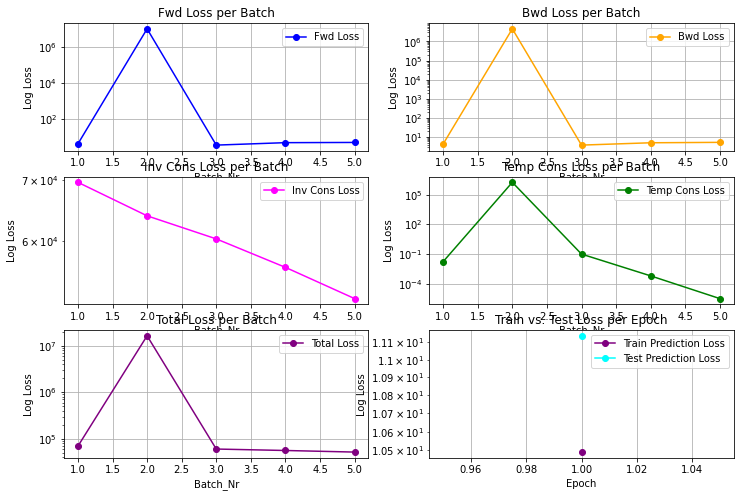

In [12]:
ko.train(TestingKoop, train_dataloader, test_dataloader, lr= 0.01, learning_rate_change=0.8, num_epochs=200, max_Kstep=15, weight_decay=0.01, model_name='TestingKoop10')
